   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.0              0.27         0.36            20.7      0.045  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 45.0                 170.0   1.0010  3.00       0.45  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

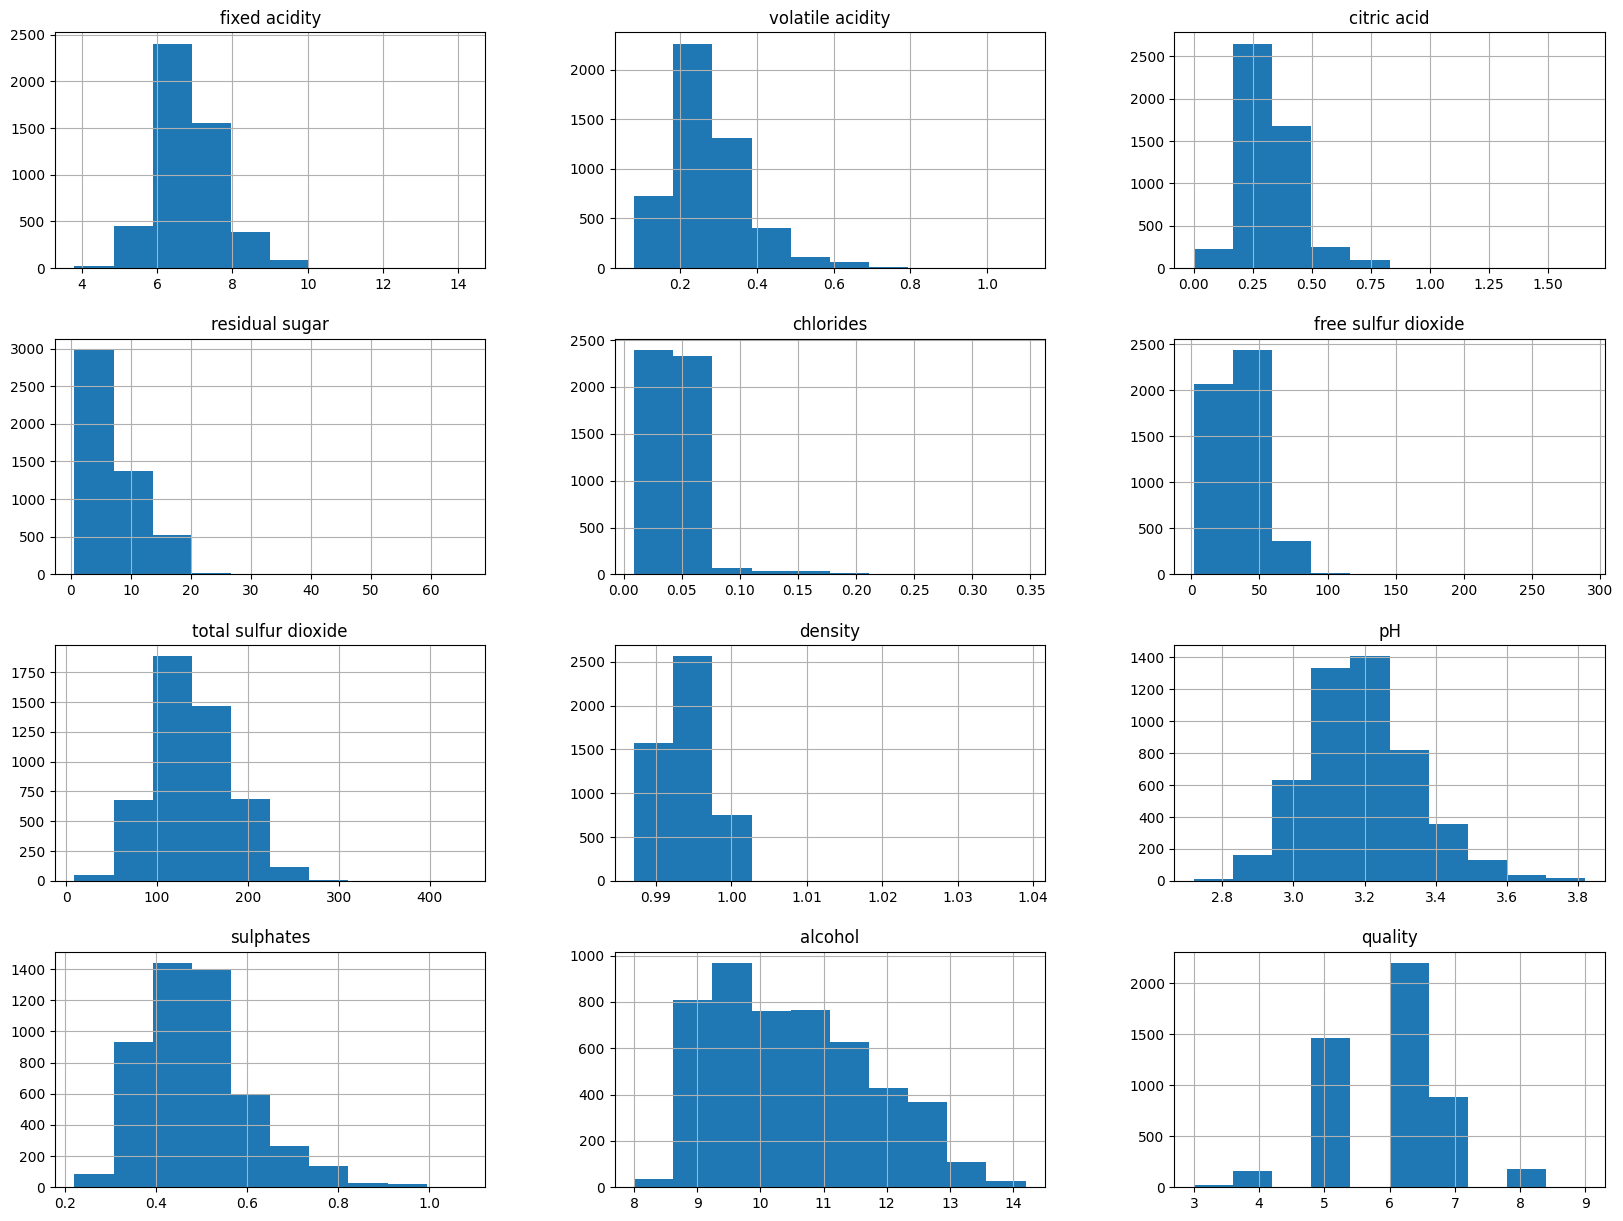

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


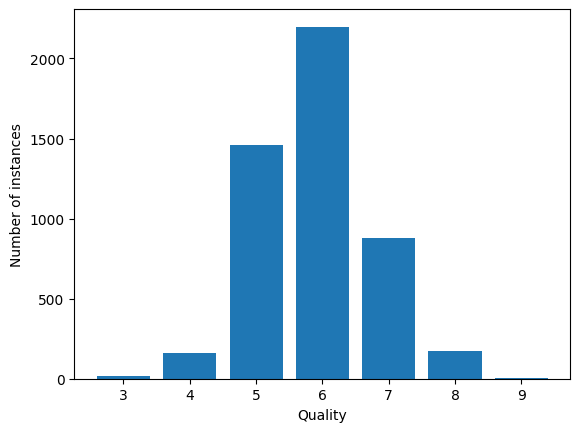

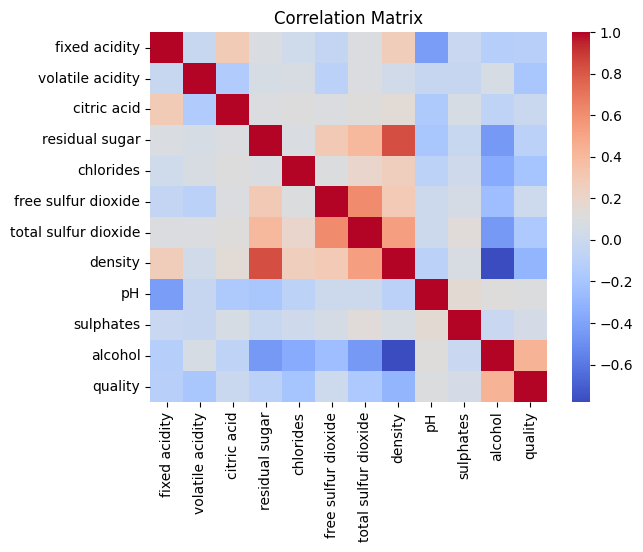

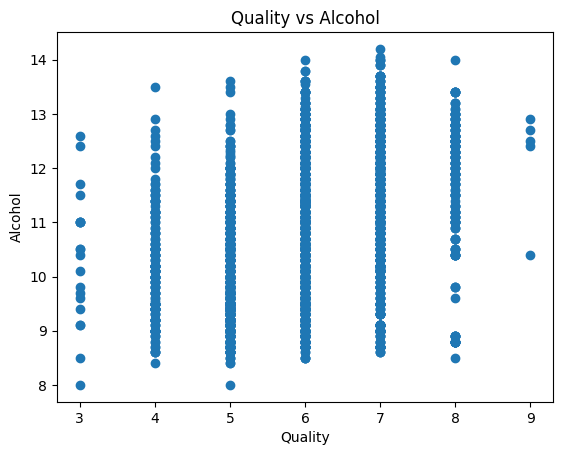

Number of missing values in 'quality': 0
Linear Regression MSE: 0.5690247717229254
Logistic Regression Accuracy: 0.5316326530612245
Random Forest Accuracy: 0.6908163265306122
SVM Accuracy: 0.5091836734693878
Linear Regression Co-efficient: [ 0.03876294 -0.1945387  -0.00734062  0.36607545 -0.00057702  0.08536602
 -0.01018555 -0.37543964  0.09020353  0.07371875  0.28116082]
Logistic Regression Co-efficient: [[ 0.78530266  0.53167522 -0.00898225 -0.35280157  0.50657153  0.48505311
  -0.24951682 -0.07984639  0.26229966 -0.32316042 -0.43524586]
 [-0.35391163  0.63992534  0.01144599 -1.21630777  0.2366172  -0.78923837
  -0.03825902  1.21455406 -0.43471143 -0.09032855 -0.60360436]
 [-0.49601033  0.26039298  0.0089302  -0.50771201  0.21200097 -0.24699442
   0.21312862  0.66303569 -0.49278699 -0.07741022 -0.89288822]
 [-0.61884625 -0.3413806   0.01531205 -0.24346448  0.26891344 -0.08646611
   0.10548461  0.68580244 -0.47529717  0.05281964  0.23257366]
 [-0.15772961 -0.52179307 -0.10385706  0.93

In [3]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Load the dataset from a CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(url, sep=';')

#Display the first few rows of the dataset
print(data.head())

#Create a histogram for each column in the DataFrame
data.hist(bins=10, figsize=(20,15))
plt.show()

#Count the number of instances for each class
class_counts = data['quality'].value_counts()
print(class_counts)

#Visualize the count of each class using a bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Quality')
plt.ylabel('Number of instances')
plt.show()

#Compute the correlation matrix
corr = data.corr()

#Visualize the correlation matrix using a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

#Create a scatter plot of quality and alcohol
plt.scatter(data['quality'], data['alcohol'])
plt.title('Quality vs Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

#Check for missing values in the "quality" column
missing = data['quality'].isnull().sum()
print("Number of missing values in 'quality':", missing)

#Drop rows with missing values
data.dropna(subset=['quality'], inplace=True)

#Define the features and target variables
X = data.drop(['quality'], axis=1)
y = data['quality']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Make predictions using the linear regression model
lr_pred = lr_model.predict(X_test)

#Calculate the mean squared error for the linear regression model
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

#Train the logistic regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

#Make predictions using the logistic regression model
lr_pred = lr_classifier.predict(X_test)

#Calculate the accuracy for the logistic regression model
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

#Train the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

#Make predictions using the random forest classifier
rf_pred = rf_classifier.predict(X_test)

#Calculate the accuracy for the random forest classifier
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

#Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

#Make predictions using the SVM classifier
svm_pred = svm_classifier.predict(X_test)

#Calculate the accuracy for the SVM classifier

svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

#Printing Co-efficient
print("Linear Regression Co-efficient:", lr_model.coef_)
print("Logistic Regression Co-efficient:", lr_classifier.coef_)
print("Random Forest Feature Importances:", rf_classifier.feature_importances_)

#Printing accuracy score
print("Linear Regression MSE:", lr_mse)
print("Logistic Regression Accuracy:", lr_acc)
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)

#Print the confusion matrix and classification report for the random forest classifier
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)

rf_cr = classification_report(y_test, rf_pred, zero_division=1)
print("Random Forest Classification Report:")
print(rf_cr)

#Conclusion
print("Based on the results of the different models, it appears that the Random Forest Classifier is the best model for predicting wine quality from the given features. It has the highest accuracy and F1-score, and a relatively low mean squared error. However, the Linear Regression and Logistic Regression models also perform well, with the Linear Regression model providing insight into the relationship between the features and the target variable. Further analysis, such as feature engineering or hyperparameter tuning, may be able to improve the performance of these models.")